In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
main_dir = '/Users/jonaheaton/ReviveMed Dropbox/Jonah Eaton/stanford-hmp2'
x_rcc_test_file = '/Users/jonaheaton/ReviveMed Dropbox/Jonah Eaton/development_CohortCombination/alignment_RCC_2024_Feb_27/April_30_Finetune_Data/X_finetune_test.csv'

x_rcc_test = pd.read_csv(x_rcc_test_file, index_col=0)

In [3]:
main_alignment = pd.read_csv(f'{main_dir}/alignment_df.csv', index_col=0)
intensity_matrix = pd.read_csv(f'{main_dir}/combined_study.csv', index_col=0)
main_metadata = pd.read_csv(f'{main_dir}/stanford-hmp2_metadata.tsv', index_col=0, sep='\t')

In [14]:
sample_info = pd.read_csv(f'{main_dir}/sample_info.csv', index_col=0)

In [4]:
main_metadata.head()

,subject ID,Study,Race,Age,BMI,SSPG,IR_IS_classification,CollectionDate,Event,Event_Note1,Event_Note2,Event_Note3,SubStudy
file name,,,,,,,,,,,,,
ZN3TBJM-1013_HILIC-pos-B1,ZN3TBJM,HMP,C,67.47,30.18,133.5,IS,623.0,Infection,D7,NaN,Infection_Late,HMP
ZNED4XZ-4014_HILIC-pos-B1,ZNED4XZ,HMP,C,59.21,31.64,NaN,Unknown,503.0,Ant_L,D21,amoxicillin,Ant_Recovery_Early,HMP
ZLZNCLZ-2013_HILIC-pos-B1,ZLZNCLZ,HMP,C,54.74,27.33,130.0,IS,622.0,Imz,D3,flu,Imz_Middle,HMP
ZLZQMEV-07_HILIC-pos-B1,ZLZQMEV,HMP,H,61.00,29.99,221.0,IR,727.0,Healthy,NaN,NaN,NaN,HMP
ZN0JE53-02_HILIC-pos-B1,ZN0JE53,HMP,B,66.81,33.32,148.0,IS,327.0,Weight-gain,NaN,NaN,NaN,HMP


In [5]:
main_metadata['file name'] = main_metadata.index
main_metadata['mzml_file'] = main_metadata['file name'].apply(lambda x: x+'.mzML')

In [6]:
main_metadata.index = main_metadata['mzml_file']

In [15]:
main_metadata =main_metadata.join(sample_info)

In [16]:
main_metadata

,subject ID,Study,Race,Age,BMI,SSPG,IR_IS_classification,CollectionDate,Event,Event_Note1,Event_Note2,Event_Note3,SubStudy,file name,mzml_file,timestamp,Ref,runtime_hour,batch_id,run_order
mzml_file,,,,,,,,,,,,,,,,,,,,
ZN3TBJM-1013_HILIC-pos-B1.mzML,ZN3TBJM,HMP,C,67.47,30.18,133.5,IS,623.0,Infection,D7,NaN,Infection_Late,HMP,ZN3TBJM-1013_HILIC-pos-B1,ZN3TBJM-1013_HILIC-pos-B1.mzML,2016-12-15 05:17:10,0,8.908333,0,9
ZNED4XZ-4014_HILIC-pos-B1.mzML,ZNED4XZ,HMP,C,59.21,31.64,NaN,Unknown,503.0,Ant_L,D21,amoxicillin,Ant_Recovery_Early,HMP,ZNED4XZ-4014_HILIC-pos-B1,ZNED4XZ-4014_HILIC-pos-B1.mzML,2016-12-15 06:37:19,0,10.244167,0,10
ZLZNCLZ-2013_HILIC-pos-B1.mzML,ZLZNCLZ,HMP,C,54.74,27.33,130.0,IS,622.0,Imz,D3,flu,Imz_Middle,HMP,ZLZNCLZ-2013_HILIC-pos-B1,ZLZNCLZ-2013_HILIC-pos-B1.mzML,2016-12-15 07:04:03,0,10.689722,0,11
ZLZQMEV-07_HILIC-pos-B1.mzML,ZLZQMEV,HMP,H,61.00,29.99,221.0,IR,727.0,Healthy,NaN,NaN,NaN,HMP,ZLZQMEV-07_HILIC-pos-B1,ZLZQMEV-07_HILIC-pos-B1.mzML,2016-12-15 08:24:11,0,12.025278,0,12
ZN0JE53-02_HILIC-pos-B1.mzML,ZN0JE53,HMP,B,66.81,33.32,148.0,IS,327.0,Weight-gain,NaN,NaN,NaN,HMP,ZN0JE53-02_HILIC-pos-B1,ZN0JE53-02_HILIC-pos-B1.mzML,2016-12-15 10:11:02,0,13.806111,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Exercise_HILIC-pos_ZN3TBJM-E17.mzML,ZN3TBJM,HMP,C,67.47,30.18,133.5,IS,1266.0,Exercise,4 hours,NaN,NaN,Exercise,Exercise_HILIC-pos_ZN3TBJM-E17,Exercise_HILIC-pos_ZN3TBJM-E17.mzML,2017-08-10 23:05:36,0,5738.715556,2,970
Exercise_HILIC-pos_ZPMBHPS-E18.mzML,ZPMBHPS,HMP,C,54.39,32.29,104.0,IS,1446.0,Exercise,6 hours,NaN,NaN,Exercise,Exercise_HILIC-pos_ZPMBHPS-E18,Exercise_HILIC-pos_ZPMBHPS-E18.mzML,2017-08-10 23:32:16,0,5739.160000,2,971
Exercise_HILIC-pos_ZPEL6L3-E18.mzML,ZPEL6L3,HMP,C,52.33,24.44,57.0,IS,1264.0,Exercise,6 hours,NaN,NaN,Exercise,Exercise_HILIC-pos_ZPEL6L3-E18,Exercise_HILIC-pos_ZPEL6L3-E18.mzML,2017-08-10 23:58:56,0,5739.604444,2,972


In [7]:
common_feats = [x for x in x_rcc_test.columns if x in intensity_matrix.index]
missing_feats = [x for x in x_rcc_test.columns if x not in intensity_matrix.index]

In [8]:
print(f'number of common features with the pretraining data: {len(common_feats)}')

number of common features with the pretraining data: 1767


In [9]:
main_matrix = intensity_matrix.loc[common_feats][main_metadata.index]


In [10]:
hmp_metadata = main_metadata[main_metadata['SubStudy'] == 'HMP'].copy()

In [12]:
healthy_hmp = hmp_metadata[hmp_metadata['Event'] == 'Healthy'].copy()

In [13]:
healthy_hmp.shape

(236, 15)

In [45]:
import seaborn as sns
import umap
from sklearn.decomposition import PCA

def generate_pca_embedding(matrix, n_components=2):
    pca = PCA(n_components=n_components)
    embedding = pca.fit_transform(matrix.T)
    return embedding

def generate_umap_embedding(matrix, n_components=2):

    reducer = umap.UMAP(n_components=n_components)
    embedding = reducer.fit_transform(matrix.T)
    return embedding

def plot_pca(embedding,metadata,col_name,yes_umap=False):

    if yes_umap:
        xvar = 'UMAP1'
        yvar = 'UMAP2'
    else:
        xvar = 'PCA1'
        yvar = 'PCA2'
    if metadata[col_name].nunique() < 10:
        palette = sns.color_palette("tab10", metadata[col_name].nunique())
        sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=metadata[col_name], palette=palette)
    else:
        sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=metadata[col_name])
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=col_name)
    plt.xlabel(xvar)
    plt.ylabel(yvar)

    # add counts to the legend
    handles, labels = plt.gca().get_legend_handles_labels()
    if metadata[col_name].nunique() < 15:
        labels = [f'{x} ({metadata[metadata[col_name]==x].shape[0]})' for x in labels]
        plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=col_name,
            ncol=2)  # ncol=2 makes the legend have 2 columns

    # add the number of samples to the title
    plt.title(f'N samples = {metadata[~metadata[col_name].isna()].shape[0]}')


In [19]:
embedding0 = generate_pca_embedding(main_matrix)
embedding1 = generate_umap_embedding(main_matrix)

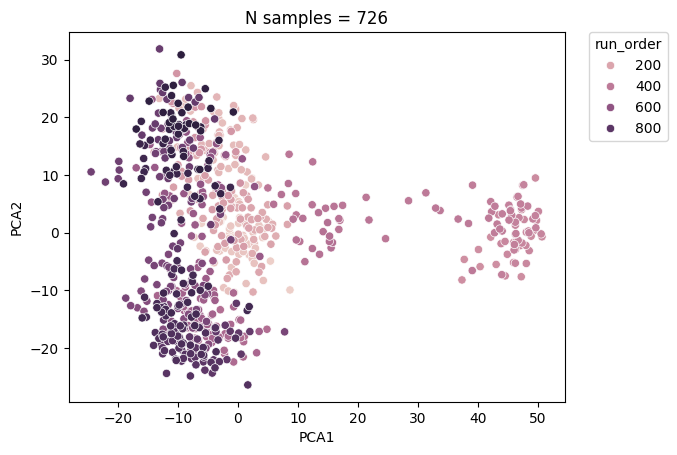

In [33]:
plot_pca(embedding0,main_metadata,col_name='run_order',yes_umap=False)

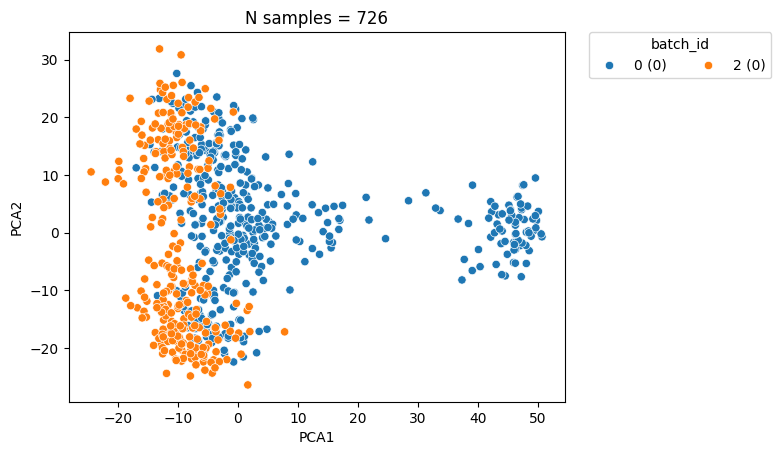

In [36]:
plot_pca(embedding0,main_metadata,col_name='batch_id',yes_umap=False)

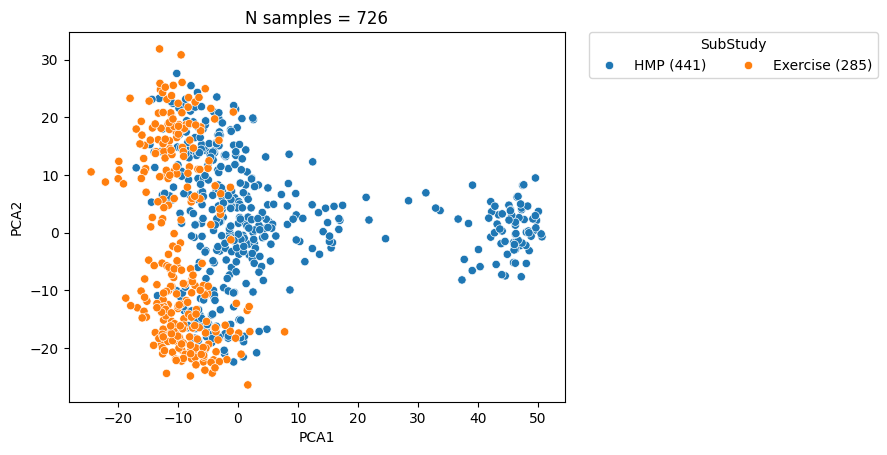

In [37]:
plot_pca(embedding0,main_metadata,col_name='SubStudy',yes_umap=False)

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
main_matrix_scaled = scaler.fit_transform(main_matrix.T)
main_matrix_scaled = pd.DataFrame(main_matrix_scaled, index=main_matrix.columns, columns=main_matrix.index)

In [48]:
# how many missing values in the data?

main_matrix_scaled.isna().sum().sum()

0

In [43]:
embedding0s = generate_pca_embedding(main_matrix_scaled.T)
embedding1s = generate_umap_embedding(main_matrix_scaled.T)

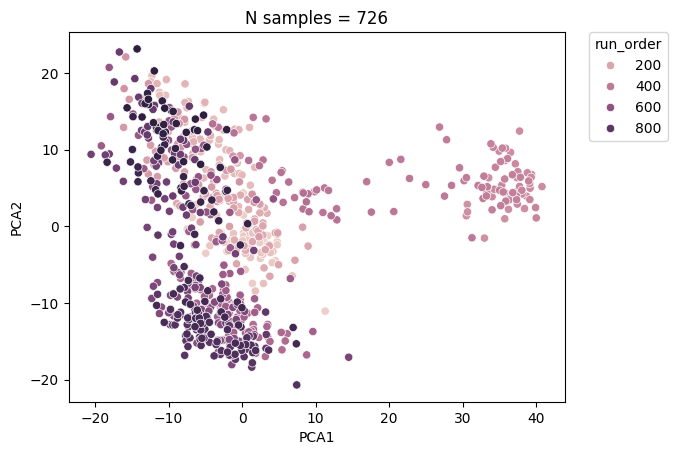

In [46]:
plot_pca(embedding0s,main_metadata,col_name='run_order',yes_umap=False)

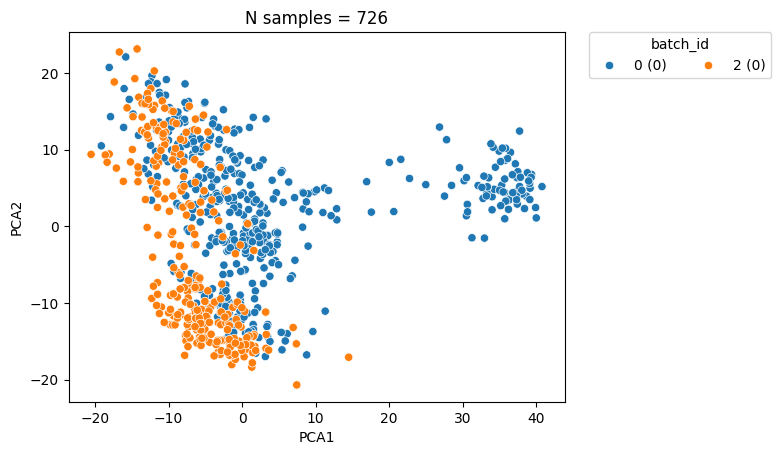

In [47]:
plot_pca(embedding0s,main_metadata,col_name='batch_id',yes_umap=False)

In [42]:
main_matrix_scaled

,FT10031,FT10041,FT10044,FT1006,FT10068,FT10089,FT10091,FT10094,FT10095,FT10097,...,FT9911,FT9913,FT9914,FT9923,FT9978,FT9980,FT9984,FT9985,FT9988,FT9997
ZN3TBJM-1013_HILIC-pos-B1.mzML,-0.701206,1.293238,-0.27077,-0.479647,-0.747138,0.296637,0.462388,1.316485,0.497344,0.838806,...,-0.486415,-0.491324,0.285228,0.618439,-0.769878,-0.585526,-1.708910,-0.498372,0.115341,-0.674164
ZNED4XZ-4014_HILIC-pos-B1.mzML,-0.701206,-0.060048,-0.27077,-0.479647,1.468425,-0.309248,-0.372195,0.615986,-0.119609,0.657299,...,0.709733,0.621697,0.404693,0.747013,-0.769878,-0.585526,0.904908,-0.498372,1.466351,-0.674164
ZLZNCLZ-2013_HILIC-pos-B1.mzML,-0.701206,-1.688649,-0.27077,-0.479647,-0.747138,-0.000283,-0.085436,1.180528,0.119605,0.577248,...,1.006385,0.989909,0.909619,-0.303159,-0.769878,-0.585526,0.503743,2.054061,0.759589,-0.674164
ZLZQMEV-07_HILIC-pos-B1.mzML,-0.701206,0.813643,-0.27077,-0.479647,-0.747138,0.828201,0.872452,0.818752,0.518796,0.775907,...,0.938247,0.930639,1.094215,1.442265,-0.769878,-0.585526,0.325595,-0.498372,0.885155,-0.674164
ZN0JE53-02_HILIC-pos-B1.mzML,-0.701206,1.817945,-0.27077,-0.479647,-0.747138,1.227859,1.237711,0.658067,0.861068,1.193887,...,1.170076,1.076595,1.243746,-1.599272,-0.769878,-0.585526,-1.708910,1.042140,0.409273,-0.674164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Exercise_HILIC-pos_ZN3TBJM-E17.mzML,1.671885,0.813915,-0.27077,-0.479647,-0.747138,0.947360,0.961754,-0.907914,0.943001,1.354358,...,-2.138632,-0.708139,-0.107277,0.474265,0.254507,-0.585526,1.150508,-0.498372,-0.116231,1.180202
Exercise_HILIC-pos_ZPMBHPS-E18.mzML,1.666784,-1.688649,-0.27077,-0.479647,-0.747138,1.606311,1.658007,-0.907914,1.025419,1.438702,...,0.693770,0.953864,0.930014,0.309877,1.766753,-0.585526,0.523602,-0.498372,0.529928,1.172179
Exercise_HILIC-pos_ZPEL6L3-E18.mzML,0.954435,-1.688649,-0.27077,-0.479647,-0.747138,0.395641,0.544330,-0.907914,1.236145,0.870615,...,0.273098,0.106529,0.434418,-1.599272,1.129653,-0.585526,0.256761,-0.498372,0.009439,1.868377
Exercise_HILIC-pos_ZWFDEY0-E18.mzML,0.815974,1.208456,-0.27077,-0.479647,-0.747138,1.909442,2.049683,-0.907914,1.039387,1.526451,...,0.242294,0.920409,0.569274,1.105709,0.944686,-0.585526,0.804498,-0.498372,-1.561969,-0.674164


In [41]:
embedding0s

array([[ 9.99098618, -2.86645567],
       [-3.36412158,  2.50883093],
       [22.20876901,  0.91907638],
       ...,
       [-1.68480289,  3.63810498],
       [-4.81251991, -1.92572918],
       [11.54794222, -8.08316009]])

In [14]:
from sklearn.preprocessing import StandardScaler

data_matrix = pd.DataFrame(index=x_rcc_test.columns, columns=main_metadata.index)
data_matrix.loc[common_feats] = main_matrix.copy()
data_matrix.fillna(data_matrix.mean(),inplace=True)

scaler = StandardScaler()
data_matrix = scaler.fit_transform(data_matrix.T).T
data_matrix = pd.DataFrame(data_matrix, index=x_rcc_test.columns, columns=main_metadata.index)

In [15]:
data_matrix.to_csv(f'{main_dir}/stamford_aligned_intensity_matrix.csv')

In [16]:
X = data_matrix.T


mzml_file,ZN3TBJM-1013_HILIC-pos-B1.mzML,ZNED4XZ-4014_HILIC-pos-B1.mzML,ZLZNCLZ-2013_HILIC-pos-B1.mzML,ZLZQMEV-07_HILIC-pos-B1.mzML,ZN0JE53-02_HILIC-pos-B1.mzML,ZMGT937-07_HILIC-pos-B1.mzML,ZN3TBJM-01_HILIC-pos-B1.mzML,ZO94RDZ-07_HILIC-pos-B1.mzML,ZNQOVZV-01_HILIC-pos-B1.mzML,ZOBX723-05_HILIC-pos-B1.mzML,...,Exercise_HILIC-pos_ZMBVNFM-E17.mzML,Exercise_HILIC-pos_ZJXC41N-E14.mzML,Exercise_HILIC-pos_ZRB0F6P-E12.mzML,Exercise_HILIC-pos_ZTL5S2Y-E14.mzML,Exercise_HILIC-pos_ZMBVNFM-E11.mzML,Exercise_HILIC-pos_ZN3TBJM-E17.mzML,Exercise_HILIC-pos_ZPMBHPS-E18.mzML,Exercise_HILIC-pos_ZPEL6L3-E18.mzML,Exercise_HILIC-pos_ZWFDEY0-E18.mzML,Exercise_HILIC-pos_ZS78KHV-E17.mzML
FT10031,-0.701206,-0.701206,-0.701206,-0.701206,-0.701206,-0.701206,-0.701206,-0.701206,-0.701206,-0.701206,...,0.759317,-0.701206,1.167886,1.036586,0.414474,1.671885,1.666784,0.954435,0.815974,1.103439
FT10035,0.246679,-0.034248,-0.195435,0.495994,-0.036970,0.457629,0.649073,-0.152485,0.324123,-1.742517,...,0.237583,0.864476,0.970496,1.392096,0.612879,1.066019,1.378655,0.400779,1.673648,0.843895
FT10037,0.246679,-0.034248,-0.195435,0.495994,-0.036970,0.457629,0.649073,-0.152485,0.324123,-1.742517,...,0.237583,0.864476,0.970496,1.392096,0.612879,1.066019,1.378655,0.400779,1.673648,0.843895
FT10039,0.246679,-0.034248,-0.195435,0.495994,-0.036970,0.457629,0.649073,-0.152485,0.324123,-1.742517,...,0.237583,0.864476,0.970496,1.392096,0.612879,1.066019,1.378655,0.400779,1.673648,0.843895
FT10041,1.293238,-0.060048,-1.688649,0.813643,1.817945,-1.688649,1.267948,-1.688649,-1.688649,-1.688649,...,-1.688649,-1.688649,0.020544,0.513029,0.674207,0.813915,-1.688649,-1.688649,1.208456,-1.688649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FT9985,-0.498372,-0.498372,2.054061,-0.498372,1.042140,0.288249,0.904272,1.804102,2.379025,1.706312,...,-0.498372,-0.498372,2.280139,-0.498372,-0.498372,-0.498372,-0.498372,-0.498372,-0.498372,-0.498372
FT9988,0.115341,1.466351,0.759589,0.885155,0.409273,1.329710,0.580309,0.556394,0.776546,-0.451117,...,0.808902,-1.561969,0.016112,-1.561969,0.900286,-0.116231,0.529928,0.009439,-1.561969,-1.561969
FT9989,0.246679,-0.034248,-0.195435,0.495994,-0.036970,0.457629,0.649073,-0.152485,0.324123,-1.742517,...,0.237583,0.864476,0.970496,1.392096,0.612879,1.066019,1.378655,0.400779,1.673648,0.843895
FT9997,-0.674164,-0.674164,-0.674164,-0.674164,-0.674164,2.053995,1.341172,-0.674164,-0.674164,1.471248,...,1.046772,1.252991,1.328005,1.469642,0.928379,1.180202,1.172179,1.868377,-0.674164,-0.674164


In [17]:
baseline_metadata = main_metadata[main_metadata['Event_Note1'] == 'Baseline'].copy()

In [19]:
baseline_metadata.shape

(35, 15)

In [57]:
baseline_metadata['subject ID'].nunique()

34

In [20]:
main_metadata.shape

(726, 15)

In [22]:
umap_data = pd.read_csv(f'{main_dir}/umap_df.csv', index_col=0)

In [24]:
umap_data[umap_data['mzlearn_cohort_id'] == '627 (adult_other)'].copy()

,UMAP1,UMAP2,mzlearn_cohort_id,file_name,MV percentage,run_order
Exercise_HILIC-pos_ZVNCGHM-E17.mzML,8.198598,7.353438,627 (adult_other),Exercise_HILIC-pos_ZVNCGHM-E17.mzML,47.81%,802
Exercise_HILIC-pos_QC40.mzML,12.169004,9.826320,627 (adult_other),Exercise_HILIC-pos_QC40.mzML,34.1%,976
ZLZQMEV-08_HILIC-pos-B1.mzML,10.407640,11.132976,627 (adult_other),ZLZQMEV-08_HILIC-pos-B1.mzML,34.05%,280
HILIC-pos-B2_QC10.mzML,12.857721,-7.505754,627 (adult_other),HILIC-pos-B2_QC10.mzML,44.74%,337
ZNQOVZV-1014_HILIC-pos-B1.mzML,11.394590,7.433653,627 (adult_other),ZNQOVZV-1014_HILIC-pos-B1.mzML,47.3%,72
...,...,...,...,...,...,...
ZN3TBJM-2013_HILIC-pos-B1.mzML,15.355146,10.468974,627 (adult_other),ZN3TBJM-2013_HILIC-pos-B1.mzML,38.12%,242
HILIC-pos-B1_QC17.mzML,10.057905,9.948465,627 (adult_other),HILIC-pos-B1_QC17.mzML,33.59%,82
HILIC-pos-B2_QC9.mzML,12.808610,-7.557105,627 (adult_other),HILIC-pos-B2_QC9.mzML,44.33%,330
Exercise_HILIC-pos_ZL63I8R-E17.mzML,8.242714,7.469500,627 (adult_other),Exercise_HILIC-pos_ZL63I8R-E17.mzML,48.45%,773


In [25]:
umap_data

,UMAP1,UMAP2,mzlearn_cohort_id,file_name,MV percentage,run_order
0212_Marios_RCC_HP-001400059-3.mzML,-4.861740,8.470291,541 (adult_cancer),0212_Marios_RCC_HP-001400059-3.mzML,19.38%,231
0680_Marios_PD1_Inhib2_HP-AF008936-8.mzML,9.565040,11.448914,541 (adult_cancer),0680_Marios_PD1_Inhib2_HP-AF008936-8.mzML,8.73%,1042
0205_Marios_RCC_HP-001300103-2.mzML,-4.901035,8.247880,541 (adult_cancer),0205_Marios_RCC_HP-001300103-2.mzML,18.1%,224
0979_Marios_PD1_Inhib2_HP-E9784263-7.mzML,9.074134,12.967177,541 (adult_cancer),0979_Marios_PD1_Inhib2_HP-E9784263-7.mzML,12.52%,1371
0380_Marios_PD1_Inhib2_HP-AG392084-34.mzML,6.295182,14.551744,541 (adult_cancer),0380_Marios_PD1_Inhib2_HP-AG392084-34.mzML,10.47%,697
...,...,...,...,...,...,...
ZN3TBJM-2013_HILIC-pos-B1.mzML,15.355146,10.468974,627 (adult_other),ZN3TBJM-2013_HILIC-pos-B1.mzML,38.12%,242
HILIC-pos-B1_QC17.mzML,10.057905,9.948465,627 (adult_other),HILIC-pos-B1_QC17.mzML,33.59%,82
HILIC-pos-B2_QC9.mzML,12.808610,-7.557105,627 (adult_other),HILIC-pos-B2_QC9.mzML,44.33%,330
Exercise_HILIC-pos_ZL63I8R-E17.mzML,8.242714,7.469500,627 (adult_other),Exercise_HILIC-pos_ZL63I8R-E17.mzML,48.45%,773


In [52]:
main_metadata[~main_metadata['BMI'].isna()]['subject ID'].nunique()

56

In [54]:
main_metadata[~(main_metadata['IR_IS_classification']=='Unknown')]['subject ID'].nunique()

41

In [55]:
main_metadata.groupby('SubStudy')['subject ID'].nunique()

SubStudy
Exercise    34
HMP         37
Name: subject ID, dtype: int64

In [26]:
import seaborn as sns

In [28]:
umap_data = umap_data.join(main_metadata)

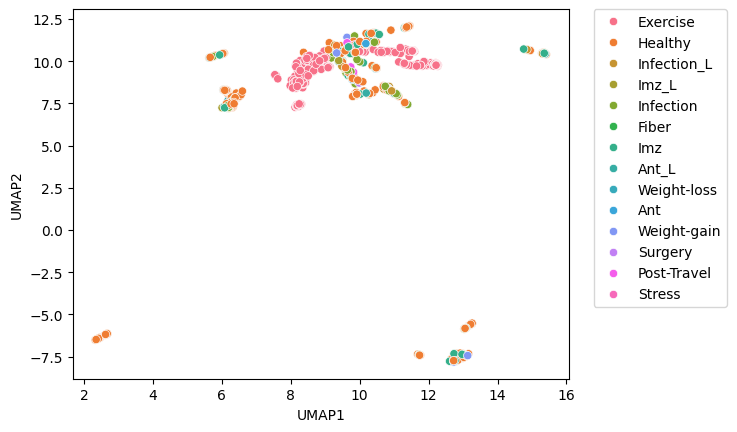

In [30]:
sns.scatterplot(data=umap_data, x='UMAP1', y='UMAP2',hue='Event')
# place a legend outside the figure/plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [31]:
# plot a umap of the data colored by the event

import umap


In [32]:
mapper = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2, metric='correlation')

embedding = mapper.fit_transform(main_matrix.T)

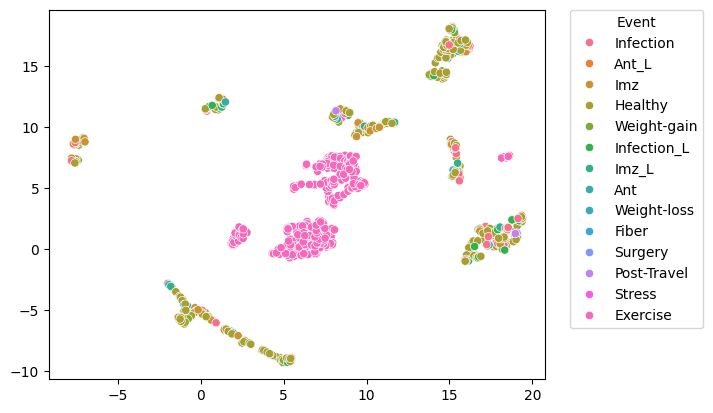

In [37]:
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=main_metadata['Event'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Event')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

Text(0, 0.5, 'UMAP2')

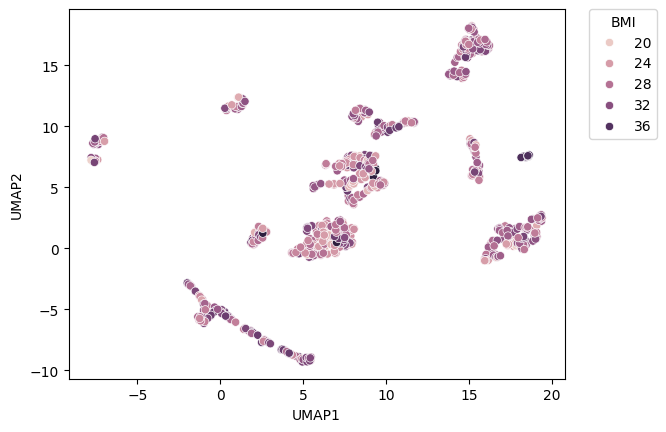

In [38]:
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=main_metadata['BMI'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='BMI')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

Text(0, 0.5, 'UMAP2')

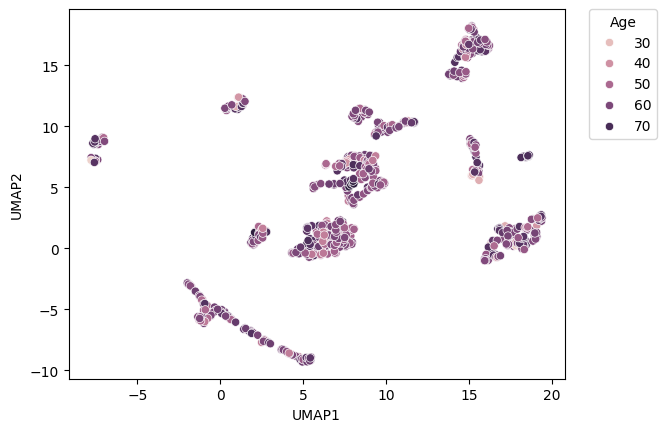

In [39]:
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=main_metadata['Age'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Age')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

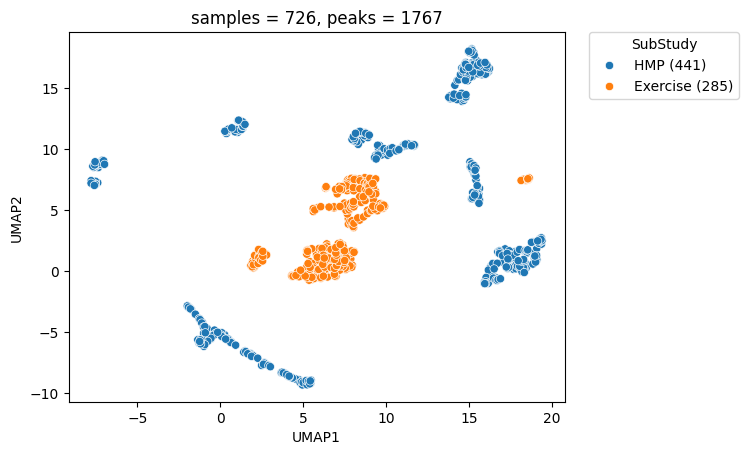

In [61]:
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=main_metadata['SubStudy'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='SubStudy')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title(f'samples = {main_metadata.shape[0]}, peaks = {main_matrix.shape[0]}')
# update the legend so the number of samples for each sub-study is shown
handles, labels = plt.gca().get_legend_handles_labels()
labels = [f'{x} ({main_metadata[main_metadata["SubStudy"]==x].shape[0]})' for x in labels]
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='SubStudy')


In [41]:
# plot the PCA of the data colored by the event

from sklearn.decomposition import PCA


In [42]:
pca = PCA(n_components=2)

pca_embedding = pca.fit_transform(main_matrix.T)



Text(0, 0.5, 'PCA2')

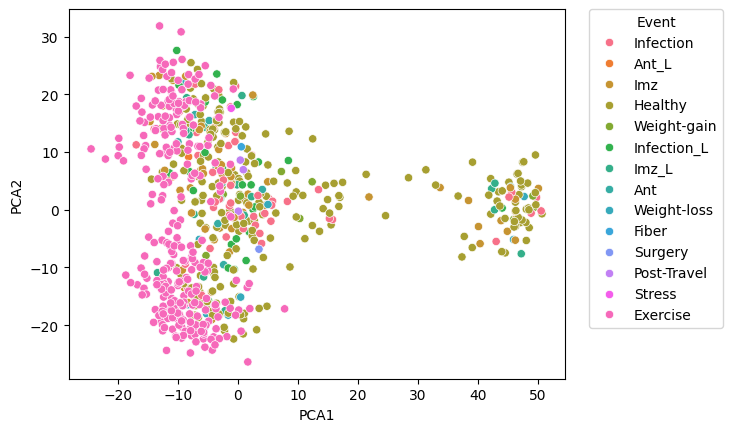

In [43]:
sns.scatterplot(x=pca_embedding[:,0], y=pca_embedding[:,1], hue=main_metadata['Event'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Event')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

Text(0, 0.5, 'PCA2')

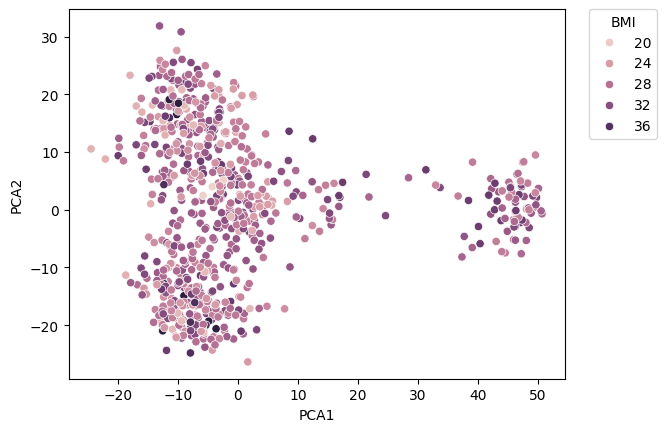

In [44]:
sns.scatterplot(x=pca_embedding[:,0], y=pca_embedding[:,1], hue=main_metadata['BMI'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='BMI')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

Text(0, 0.5, 'PCA2')

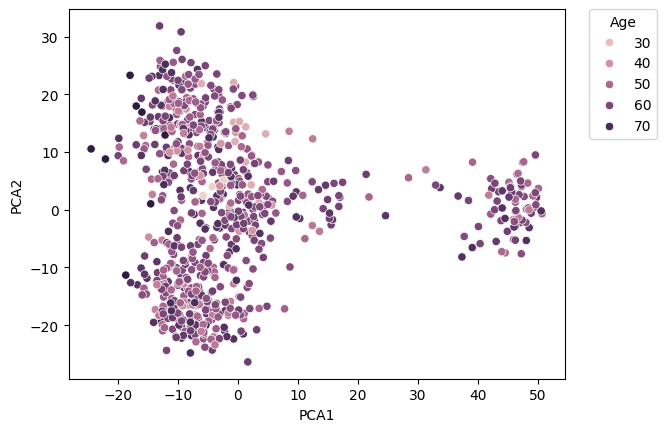

In [45]:
sns.scatterplot(x=pca_embedding[:,0], y=pca_embedding[:,1], hue=main_metadata['Age'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Age')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

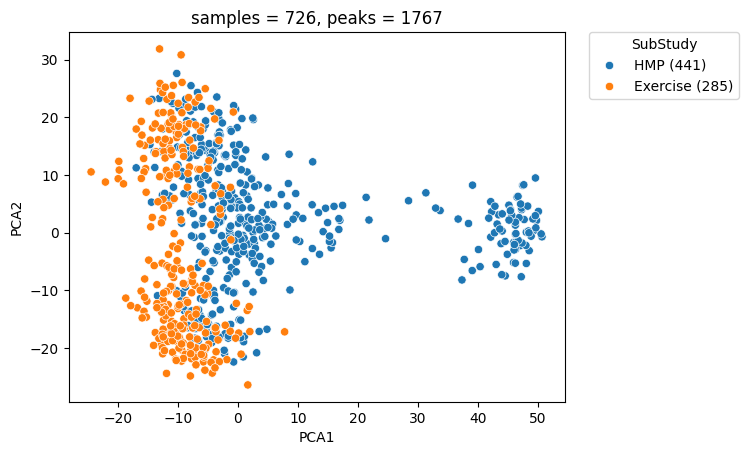

In [62]:
sns.scatterplot(x=pca_embedding[:,0], y=pca_embedding[:,1], hue=main_metadata['SubStudy'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='SubStudy')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title(f'samples = {main_metadata.shape[0]}, peaks = {main_matrix.shape[0]}')
# update the legend so the number of samples for each sub-study is shown
handles, labels = plt.gca().get_legend_handles_labels()
labels = [f'{x} ({main_metadata[main_metadata["SubStudy"]==x].shape[0]})' for x in labels]
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='SubStudy')


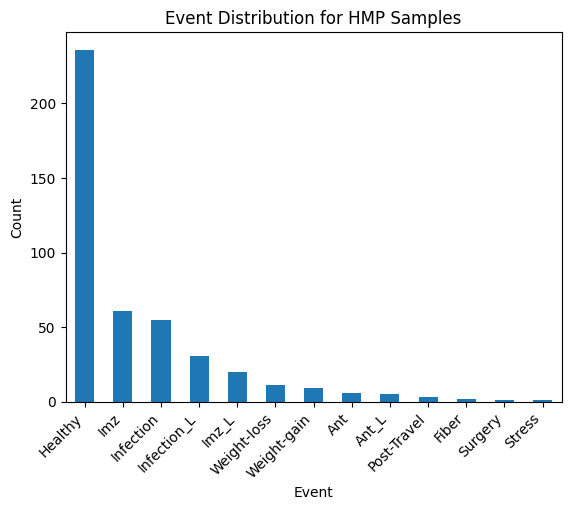

In [65]:
hmp_samples = main_metadata[main_metadata['SubStudy'] == 'HMP']
event_counts = hmp_samples['Event'].value_counts()

event_counts.plot(kind='bar')
plt.xlabel('Event')
plt.ylabel('Count')
plt.title('Event Distribution for HMP Samples')
# turn the axis labels to be 45 degrees
plt.xticks(rotation=45, ha='right')
plt.show()

In [77]:
hmp_samples['Event_Note3'].shape

(441,)

82


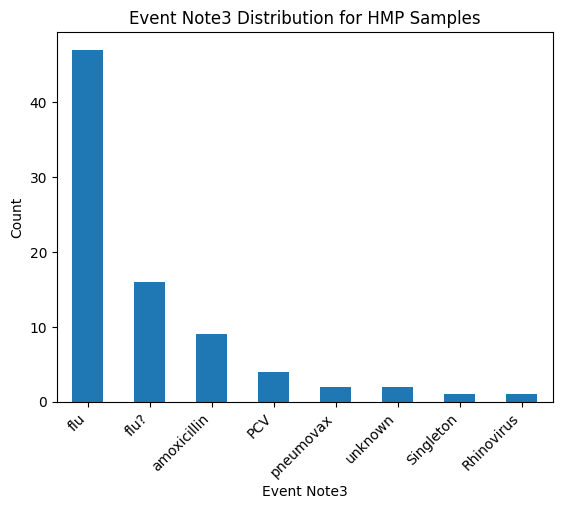

In [78]:
hmp_samples = main_metadata[main_metadata['SubStudy'] == 'HMP']
event_counts = hmp_samples['Event_Note2'].value_counts()
print((~hmp_samples['Event_Note2'].isna()).sum())

event_counts.plot(kind='bar')
plt.xlabel('Event Note3')
plt.ylabel('Count')
plt.title('Event Note3 Distribution for HMP Samples')
# turn the axis labels to be 45 degrees
plt.xticks(rotation=45, ha='right')
plt.show()

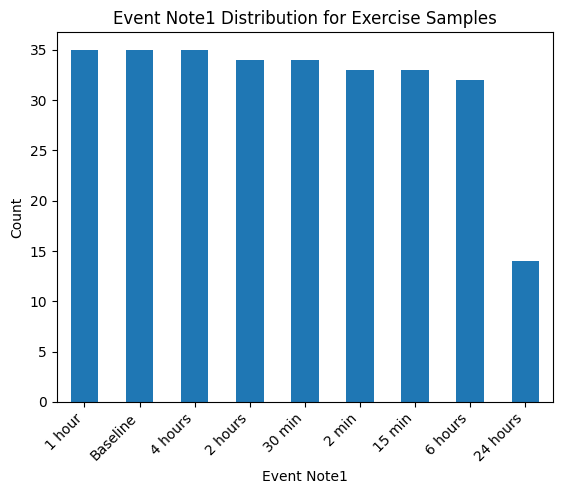

In [68]:
hmp_samples = main_metadata[main_metadata['SubStudy'] == 'Exercise']
event_counts = hmp_samples['Event_Note1'].value_counts()

event_counts.plot(kind='bar')
plt.xlabel('Event Note1')
plt.ylabel('Count')
plt.title('Event Note1 Distribution for Exercise Samples')
# turn the axis labels to be 45 degrees
plt.xticks(rotation=45, ha='right')
plt.show()

In [81]:
# create a umap embedding the HMB subset of the data

hmp_samples = main_metadata[main_metadata['SubStudy'] == 'HMP']
hmp_matrix = main_matrix[hmp_samples.index].T


In [82]:
mapper = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2)

embedding1 = mapper.fit_transform(hmp_matrix)


Text(0.5, 1.0, 'HMP samples = 439, peaks = 1767')

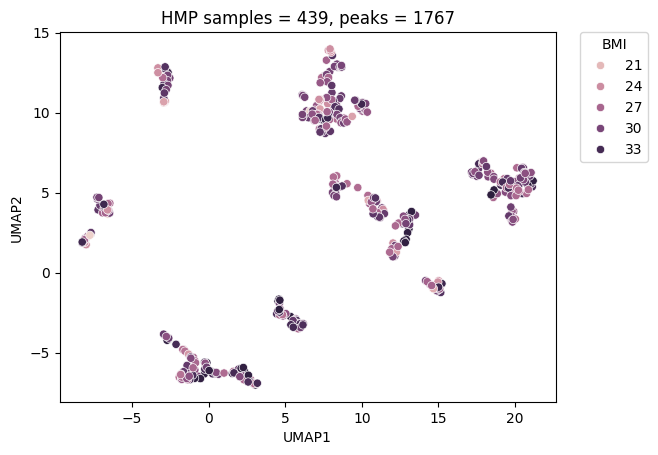

In [106]:
col_name = 'BMI'
sns.scatterplot(x=embedding1[:,0], y=embedding1[:,1], hue=hmp_samples[col_name])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=col_name)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

# add counts to the legend
handles, labels = plt.gca().get_legend_handles_labels()
if hmp_samples[col_name].nunique() < 15:
    labels = [f'{x} ({hmp_samples[hmp_samples[col_name]==x].shape[0]})' for x in labels]
    plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=col_name,
           ncol=2)  # ncol=2 makes the legend have 2 columns

# add the number of samples to the title
plt.title(f'HMP samples = {hmp_samples[~hmp_samples[col_name].isna()].shape[0]}, peaks = {hmp_matrix.shape[1]}')


In [94]:
pca1 = PCA(n_components=2)

pca_embedding1 = pca1.fit_transform(hmp_matrix)

Text(0.5, 1.0, 'HMP samples = 82, peaks = 1767')

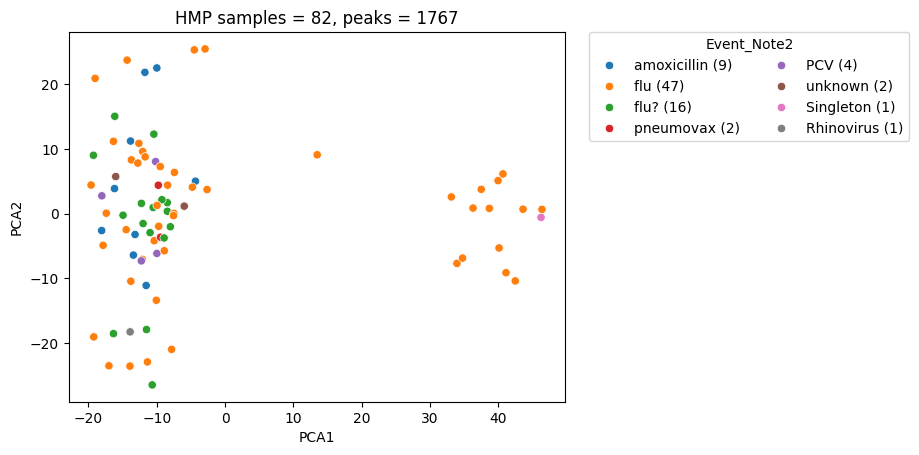

In [98]:
col_name = 'Event_Note2'
sns.scatterplot(x=pca_embedding1[:,0], y=pca_embedding1[:,1], hue=hmp_samples[col_name])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=col_name)
plt.xlabel('PCA1')
plt.ylabel('PCA2')

# add counts to the legend
handles, labels = plt.gca().get_legend_handles_labels()
labels = [f'{x} ({hmp_samples[hmp_samples[col_name]==x].shape[0]})' for x in labels]
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=col_name,
           ncol=2)  # ncol=2 makes the legend have 2 columns

# add the number of samples to the title
plt.title(f'HMP samples = {hmp_samples[~hmp_samples[col_name].isna()].shape[0]}, peaks = {hmp_matrix.shape[1]}')


In [99]:
exercise_samples = main_metadata[main_metadata['SubStudy'] == 'Exercise']
exercise_matrix = main_matrix[exercise_samples.index].T

pca2 = PCA(n_components=2)

pca_embedding2 = pca2.fit_transform(exercise_matrix)

Text(0.5, 1.0, 'Exercise samples = 439, peaks = 1767')

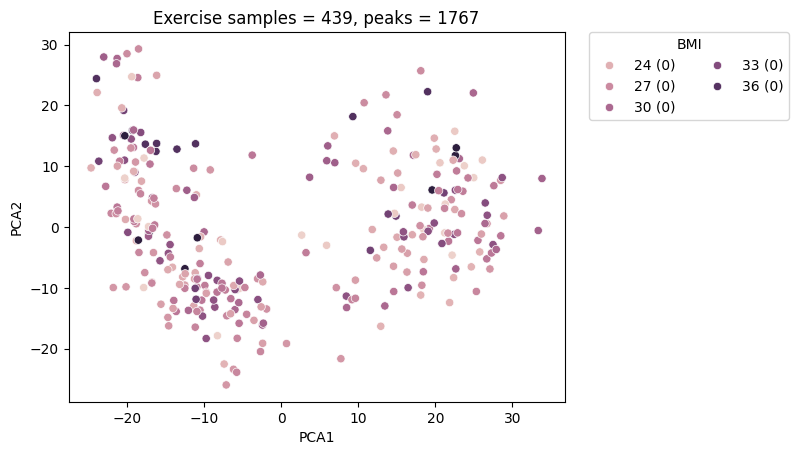

In [104]:
col_name = 'BMI'
sns.scatterplot(x=pca_embedding2[:,0], y=pca_embedding2[:,1], hue=exercise_samples[col_name])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=col_name)
plt.xlabel('PCA1')
plt.ylabel('PCA2')

# add counts to the legend
handles, labels = plt.gca().get_legend_handles_labels()
labels = [f'{x} ({exercise_samples[exercise_samples[col_name]==x].shape[0]})' for x in labels]
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=col_name,
           ncol=2)  # ncol=2 makes the legend have 2 columns

# add the number of samples to the title
plt.title(f'Exercise samples = {hmp_samples[~hmp_samples[col_name].isna()].shape[0]}, peaks = {hmp_matrix.shape[1]}')


In [101]:
mapper2 = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2)

embedding2 = mapper2.fit_transform(exercise_matrix)


Text(0.5, 1.0, 'Exercise samples = 179, peaks = 1767')

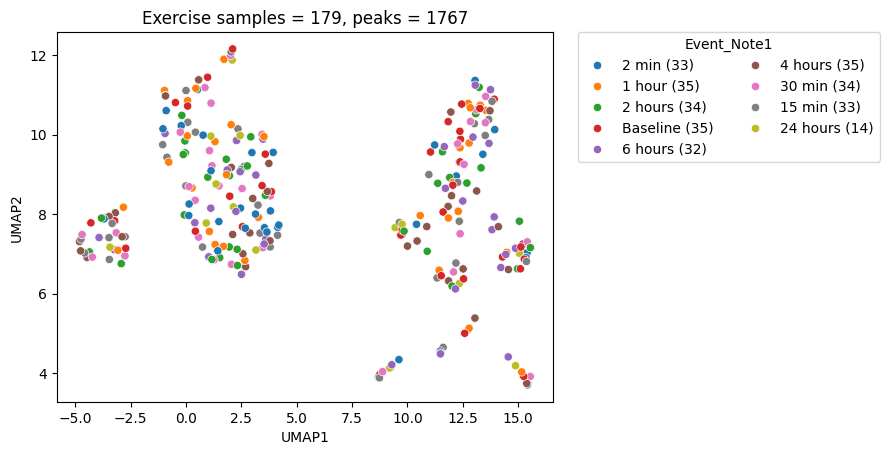

In [102]:
col_name = 'Event_Note1'
sns.scatterplot(x=embedding2[:,0], y=embedding2[:,1], hue=exercise_samples[col_name])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=col_name)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

# add counts to the legend
handles, labels = plt.gca().get_legend_handles_labels()
labels = [f'{x} ({exercise_samples[exercise_samples[col_name]==x].shape[0]})' for x in labels]
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=col_name,
           ncol=2)  # ncol=2 makes the legend have 2 columns

# add the number of samples to the title
plt.title(f'Exercise samples = {hmp_samples[~hmp_samples[col_name].isna()].shape[0]}, peaks = {hmp_matrix.shape[1]}')


Text(0.5, 1.0, 'Exercise samples = 439, peaks = 1767')

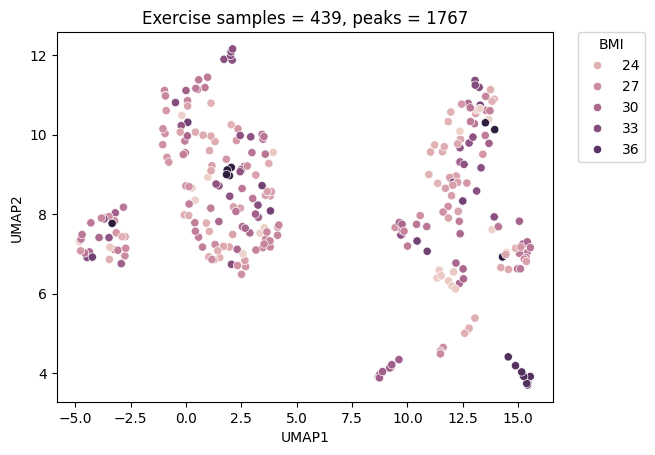

In [105]:
col_name = 'BMI'
sns.scatterplot(x=embedding2[:,0], y=embedding2[:,1], hue=exercise_samples[col_name])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=col_name)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

# add counts to the legend
handles, labels = plt.gca().get_legend_handles_labels()
if exercise_samples[col_name].nunique() < 15:
    labels = [f'{x} ({exercise_samples[exercise_samples[col_name]==x].shape[0]})' for x in labels]
    plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=col_name,
           ncol=2)  # ncol=2 makes the legend have 2 columns

# add the number of samples to the title
plt.title(f'Exercise samples = {hmp_samples[~hmp_samples[col_name].isna()].shape[0]}, peaks = {hmp_matrix.shape[1]}')


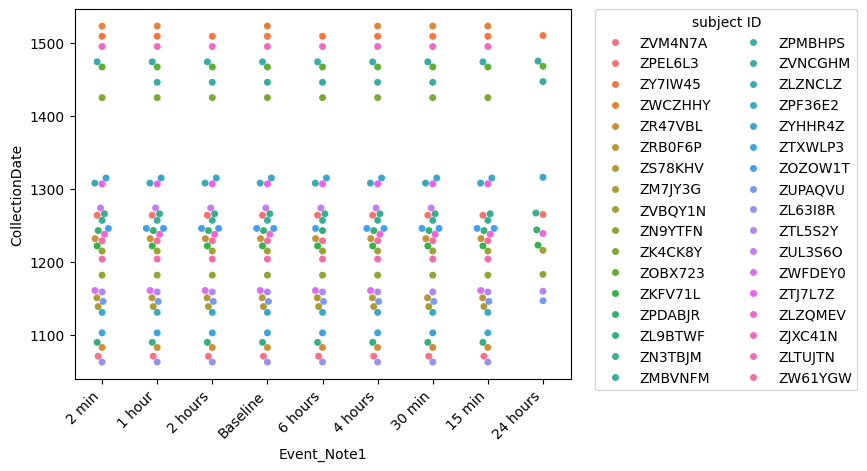

In [110]:
# for the "excerise samples", plot a scatterplot of the "CollectionDate" column with the "Event_Note1" column

exercise_samples = main_metadata[main_metadata['SubStudy'] == 'Exercise']
sns.swarmplot(data=exercise_samples, x='Event_Note1', y='CollectionDate',hue='subject ID')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='subject ID', ncols=2)

/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/seaborn/categorical.py:3370: UserWarning: 10.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/seaborn/categorical.py:3370: UserWarning: 45.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/seaborn/categorical.py:3370: UserWarning: 34.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


/Users/jonaheaton/opt/miniconda3/envs/mz_embed_engine/lib/python3.9/site-packages/seaborn/categorical.py:3370: UserWarning: 34.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


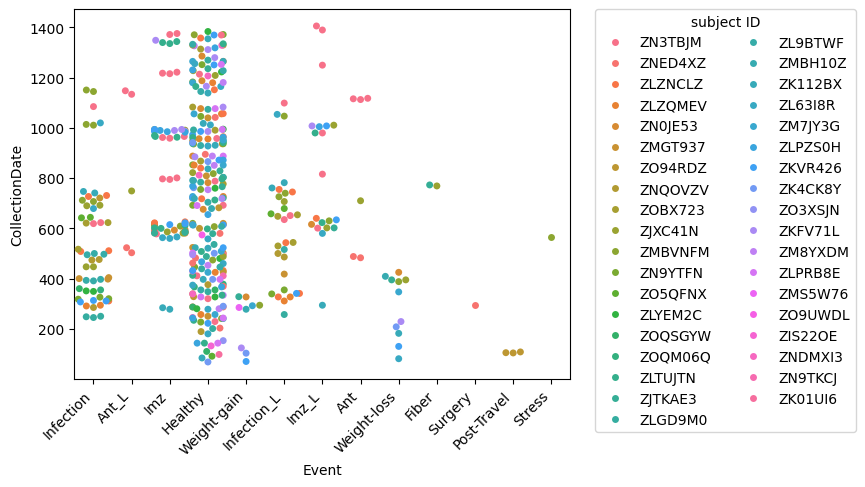

In [113]:
hmb_samples = main_metadata[main_metadata['SubStudy'] == 'HMP']
sns.swarmplot(data=hmb_samples, x='Event', y='CollectionDate',hue='subject ID')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='subject ID', ncols=2)

In [143]:
one_patient = hmp_samples[hmp_samples['subject ID'] == 'ZJTKAE3'].copy()

In [147]:
one_patient.sort_values('CollectionDate', inplace=True)

In [148]:
one_patient

,subject ID,Study,Race,Age,BMI,SSPG,IR_IS_classification,CollectionDate,Event,Event_Note1,Event_Note2,Event_Note3,SubStudy,file name,mzml_file
mzml_file,,,,,,,,,,,,,,,
ZJTKAE3-02_HILIC-pos-B2.mzML,ZJTKAE3,HMP,C,58.65,31.24,162.0,IR,328.0,Weight-gain,NaN,NaN,NaN,HMP,ZJTKAE3-02_HILIC-pos-B2,ZJTKAE3-02_HILIC-pos-B2.mzML
ZJTKAE3-03_HILIC-pos-B2.mzML,ZJTKAE3,HMP,C,58.65,31.24,162.0,IR,395.0,Weight-loss,NaN,NaN,NaN,HMP,ZJTKAE3-03_HILIC-pos-B2,ZJTKAE3-03_HILIC-pos-B2.mzML
ZJTKAE3-04_HILIC-pos-B2.mzML,ZJTKAE3,HMP,C,58.65,31.24,162.0,IR,488.0,Healthy,NaN,NaN,NaN,HMP,ZJTKAE3-04_HILIC-pos-B2,ZJTKAE3-04_HILIC-pos-B2.mzML
ZJTKAE3-1011_HILIC-pos-B2.mzML,ZJTKAE3,HMP,C,58.65,31.24,162.0,IR,579.0,Healthy,NaN,NaN,NaN,HMP,ZJTKAE3-1011_HILIC-pos-B2,ZJTKAE3-1011_HILIC-pos-B2.mzML
ZJTKAE3-2012_HILIC-pos-B2.mzML,ZJTKAE3,HMP,C,58.65,31.24,162.0,IR,581.0,Imz,D1,flu?,Imz_Early,HMP,ZJTKAE3-2012_HILIC-pos-B2,ZJTKAE3-2012_HILIC-pos-B2.mzML
ZJTKAE3-2013_HILIC-pos-B2.mzML,ZJTKAE3,HMP,C,58.65,31.24,162.0,IR,584.0,Imz,D4,flu?,Imz_Middle,HMP,ZJTKAE3-2013_HILIC-pos-B2,ZJTKAE3-2013_HILIC-pos-B2.mzML
ZJTKAE3-2014_HILIC-pos-B2.mzML,ZJTKAE3,HMP,C,58.65,31.24,162.0,IR,587.0,Imz,D7,flu?,Imz_Late,HMP,ZJTKAE3-2014_HILIC-pos-B2,ZJTKAE3-2014_HILIC-pos-B2.mzML
ZJTKAE3-2015_HILIC-pos-B2.mzML,ZJTKAE3,HMP,C,58.65,31.24,162.0,IR,602.0,Imz_L,D22,flu?,Imz_Recovery_Early,HMP,ZJTKAE3-2015_HILIC-pos-B2,ZJTKAE3-2015_HILIC-pos-B2.mzML
ZJTKAE3-06_HILIC-pos-B2.mzML,ZJTKAE3,HMP,C,58.65,31.24,162.0,IR,721.0,Healthy,NaN,NaN,NaN,HMP,ZJTKAE3-06_HILIC-pos-B2,ZJTKAE3-06_HILIC-pos-B2.mzML


Text(0.5, 1.0, 'Event over time for patient ZJTKAE3')

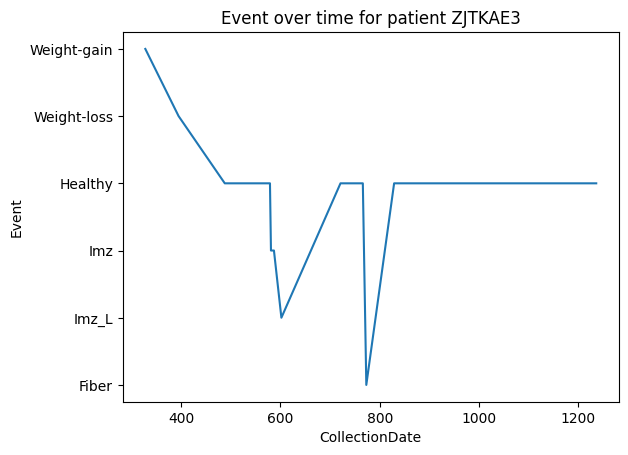

In [149]:
sns.lineplot(data=one_patient, x='CollectionDate', y='Event')
plt.title('Event over time for patient ZJTKAE3')

In [115]:
hmp_samples[hmp_samples['subject ID'] == 'ZJTKAE3']['CollectionDate']

mzml_file
ZJTKAE3-6031_HILIC-pos-B2.mzML     948.0
ZJTKAE3-07_HILIC-pos-B2.mzML       773.0
ZJTKAE3-03_HILIC-pos-B2.mzML       395.0
ZJTKAE3-06_HILIC-pos-B2.mzML       721.0
ZJTKAE3-02_HILIC-pos-B2.mzML       328.0
ZJTKAE3-04_HILIC-pos-B2.mzML       488.0
ZJTKAE3-6011_HILIC-pos-B2.mzML     766.0
ZJTKAE3-2013_HILIC-pos-B2.mzML     584.0
ZJTKAE3-1011_HILIC-pos-B2.mzML     579.0
ZJTKAE3-6021_HILIC-pos-B2.mzML     829.0
ZJTKAE3-2014_HILIC-pos-B2.mzML     587.0
ZJTKAE3-10_HILIC-pos-B2.mzML      1236.0
ZJTKAE3-2015_HILIC-pos-B2.mzML     602.0
ZJTKAE3-2012_HILIC-pos-B2.mzML     581.0
Name: CollectionDate, dtype: float64

In [131]:
# get a list of the unique subject IDs
subject_ids = main_metadata['subject ID'].unique()
chosen_samples = []
for id in subject_ids:
    # get the subset of the data for the subject ID
    subset = main_metadata[main_metadata['subject ID'] == id]
    # remove the rows without BMI
    subset = subset[~subset['BMI'].isna()]
    # check if the subset has more than 1 row
    if subset.shape[0] == 0:
        continue

    # if subset.shape[0] == 1:
        # chosen_samples.append(subset.index[0])
        # continue

    # if the subStudy is HMP, choose the sample with the lowest value in the CollectionDate column

    if subset['SubStudy'].iloc[0] == 'HMP':
        chosen_samples.append(subset[subset['CollectionDate'] == subset['CollectionDate'].min()].index[0])
        continue
    elif subset['SubStudy'].iloc[0] == 'Exercise':
        # continue
        baseline_subset = subset[subset['Event_Note1'] == 'Baseline']
        if baseline_subset.shape[0] == 0:
            continue
        elif baseline_subset.shape[0] == 1:
            chosen_samples.append(baseline_subset.index[0])
        else:
            print('duplicate baselines for subject ID:', id)
            chosen_samples.append(baseline_subset.index[0])
            # chosen_samples.append(baseline_subset[baseline_subset['CollectionDate'] == baseline_subset['CollectionDate'].min()].index[0])


duplicate baselines for subject ID: ZOZOW1T


In [132]:
len(chosen_samples)

56

In [123]:
len(subject_ids)

58

In [133]:
chosen_samples

['ZN3TBJM-01_HILIC-pos-B1.mzML',
 'ZNED4XZ-01_HILIC-pos-B1.mzML',
 'ZLZNCLZ-01_HILIC-pos-B1.mzML',
 'ZLZQMEV-01_HILIC-pos-B1.mzML',
 'ZN0JE53-02_HILIC-pos-B1.mzML',
 'ZMGT937-01_HILIC-pos-B1.mzML',
 'ZO94RDZ-02_HILIC-pos-B1.mzML',
 'ZNQOVZV-01_HILIC-pos-B1.mzML',
 'ZOBX723-1013_HILIC-pos-B1.mzML',
 'ZJXC41N-03_HILIC-pos-B2.mzML',
 'ZMBVNFM-01_HILIC-pos-B1.mzML',
 'ZN9YTFN-01_HILIC-pos-B1.mzML',
 'ZO5QFNX-01_HILIC-pos-B1.mzML',
 'ZLYEM2C-01_HILIC-pos-B1.mzML',
 'ZOQSGYW-03_HILIC-pos-B1.mzML',
 'ZOQM06Q-1011_HILIC-pos-B1.mzML',
 'ZLTUJTN-05_HILIC-pos-B2.mzML',
 'ZJTKAE3-02_HILIC-pos-B2.mzML',
 'ZLGD9M0-05_HILIC-pos-B2.mzML',
 'ZL9BTWF-06_HILIC-pos-B2.mzML',
 'ZMBH10Z-01_HILIC-pos-B2.mzML',
 'ZK112BX-01_HILIC-pos-B2.mzML',
 'ZL63I8R-03_HILIC-pos-B2.mzML',
 'ZM7JY3G-01_HILIC-pos-B2.mzML',
 'ZLPZS0H-05_HILIC-pos-B2.mzML',
 'ZKVR426-02_HILIC-pos-B2.mzML',
 'ZK4CK8Y-01_HILIC-pos-B2.mzML',
 'ZO3XSJN-01_HILIC-pos-B2.mzML',
 'ZKFV71L-02_HILIC-pos-B2.mzML',
 'ZM8YXDM-01_HILIC-pos-B2.mzML',
 'ZLPR

In [134]:
chosen_metadata = main_metadata.loc[chosen_samples].copy()
chosen_matrix = main_matrix[chosen_samples].T

In [135]:

pca3 = PCA(n_components=2)

pca_embedding3 = pca3.fit_transform(chosen_matrix)

In [136]:
mapper3 = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2)

embedding3 = mapper3.fit_transform(chosen_matrix)

Text(0.5, 1.0, '"Baseline" samples = 56, peaks = 1767')

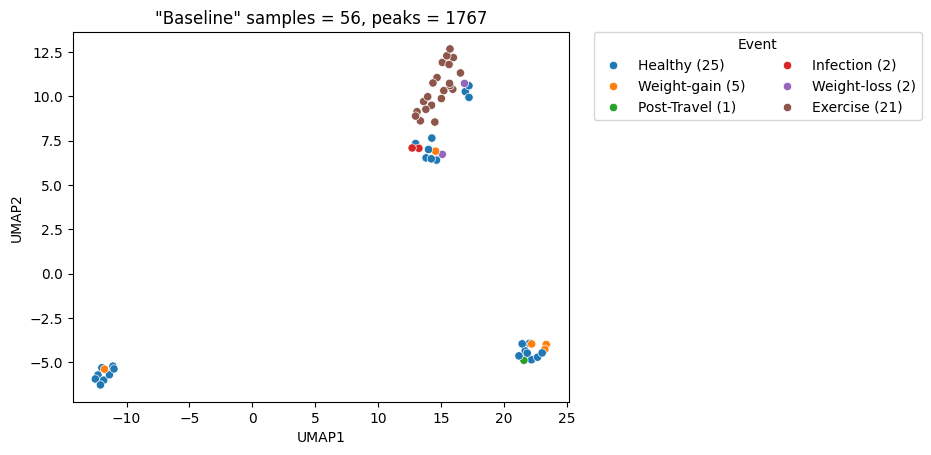

In [142]:
col_name = 'Event'
sns.scatterplot(x=embedding3[:,0], y=embedding3[:,1], hue=chosen_metadata[col_name])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=col_name)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

# add counts to the legend
handles, labels = plt.gca().get_legend_handles_labels()
if exercise_samples[col_name].nunique() < 15:
    labels = [f'{x} ({chosen_metadata[chosen_metadata[col_name]==x].shape[0]})' for x in labels]
    plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=col_name,
           ncol=2)  # ncol=2 makes the legend have 2 columns

# add the number of samples to the title
plt.title(f'"Baseline" samples = {chosen_metadata[~chosen_metadata[col_name].isna()].shape[0]}, peaks = {hmp_matrix.shape[1]}')


Text(0.5, 1.0, '"Baseline" samples = 56, peaks = 1767')

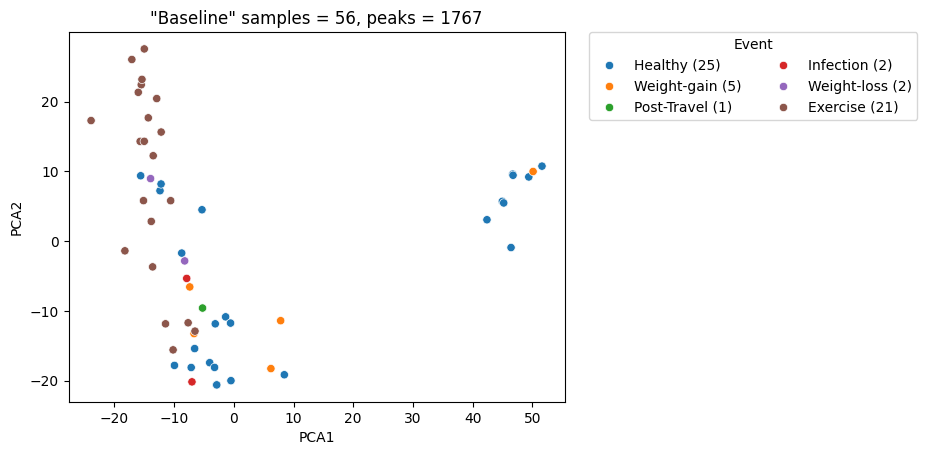

In [141]:
col_name = 'Event'
sns.scatterplot(x=pca_embedding3[:,0], y=pca_embedding3[:,1], hue=chosen_metadata[col_name])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=col_name)
plt.xlabel('PCA1')
plt.ylabel('PCA2')

# add counts to the legend
handles, labels = plt.gca().get_legend_handles_labels()
if exercise_samples[col_name].nunique() < 15:
    labels = [f'{x} ({chosen_metadata[chosen_metadata[col_name]==x].shape[0]})' for x in labels]
    plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=col_name,
           ncol=2)  # ncol=2 makes the legend have 2 columns

# add the number of samples to the title
plt.title(f'"Baseline" samples = {chosen_metadata[~chosen_metadata[col_name].isna()].shape[0]}, peaks = {hmp_matrix.shape[1]}')


## Scaling the data for the chosen samples and prep for finetune with pretrained model

In [152]:
from sklearn.preprocessing import StandardScaler

data_matrix = pd.DataFrame(index=x_rcc_test.columns, columns=chosen_metadata.index)
data_matrix.loc[common_feats] = chosen_matrix.T.copy()
data_matrix.fillna(data_matrix.mean(),inplace=True)

scaler = StandardScaler()
data_matrix = scaler.fit_transform(data_matrix.T).T
data_matrix = pd.DataFrame(data_matrix, index=x_rcc_test.columns, columns=chosen_metadata.index)

In [155]:
mapper4 = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2)

embedding4 = mapper4.fit_transform(data_matrix.T)

Text(0.5, 1.0, '"Baseline" after StdScale samples = 56, peaks = 1767')

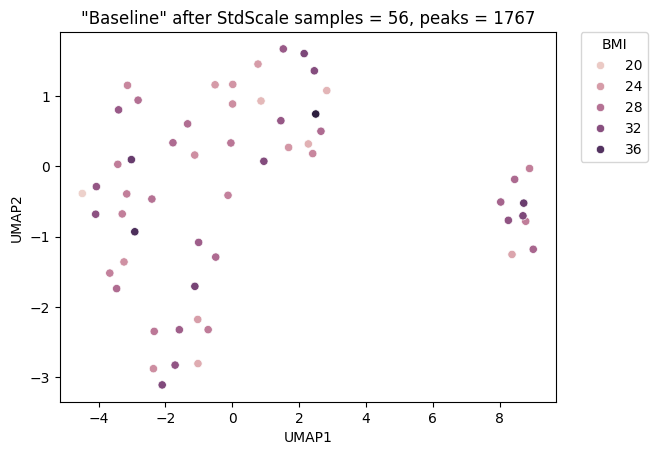

In [158]:
col_name = 'BMI'
sns.scatterplot(x=embedding4[:,0], y=embedding4[:,1], hue=chosen_metadata[col_name])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=col_name)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

# add counts to the legend
handles, labels = plt.gca().get_legend_handles_labels()
if exercise_samples[col_name].nunique() < 15:
    labels = [f'{x} ({chosen_metadata[chosen_metadata[col_name]==x].shape[0]})' for x in labels]
    plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=col_name,
           ncol=2)  # ncol=2 makes the legend have 2 columns

# add the number of samples to the title
plt.title(f'"Baseline" after StdScale samples = {chosen_metadata[~chosen_metadata[col_name].isna()].shape[0]}, peaks = {hmp_matrix.shape[1]}')


In [162]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)


y = chosen_metadata
X = data_matrix.T
y_target = chosen_metadata['SubStudy']

data_dir = os.path.join(main_dir, 'data_v1')

for i, (train_index, test_index) in enumerate(skf.split(X, y_target)):
    fold_dir = os.path.join(data_dir, f'fold_{i}')
    os.makedirs(fold_dir, exist_ok=True)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_train.to_csv(os.path.join(fold_dir, f'X_stanford_bs_train.csv'))
    X_test.to_csv(os.path.join(fold_dir, f'X_stanford_bs_val.csv'))
    y_train.to_csv(os.path.join(fold_dir, f'y_stanford_bs_train.csv'))
    y_test.to_csv(os.path.join(fold_dir, f'y_stanford_bs_val.csv'))